<a href="https://colab.research.google.com/github/mabhipsa12/Scorecard-Project/blob/main/scorecard_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Step 1: Load and Explore the Datasets

Objective:\
1) Load the application_record.csv and credit_record.csv.\
2) Check basic details like shape, missing values, and data types.



In [6]:
import pandas as pd
import numpy as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
app_df = pd.read_csv('/application_record.csv')
credit_df = pd.read_csv('/credit_record.csv')

In [8]:
# Display first 5 rows of each dataset
print("\nApplication Data Sample:")
display(app_df.head())

print("\nCredit Data Sample:")
display(credit_df.head())


Application Data Sample:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0



Credit Data Sample:


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
# Check shape
print(f"\nApplication Data Shape: {app_df.shape}")
print(f"Credit Data Shape: {credit_df.shape}")



Application Data Shape: (438557, 18)
Credit Data Shape: (1048575, 3)


In [10]:
# Check missing values
print("\nMissing Values in Application Data:")
print(app_df.isnull().sum())

print("\nMissing Values in Credit Data:")
print(credit_df.isnull().sum())



Missing Values in Application Data:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Missing Values in Credit Data:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [11]:
# Check column types
print("\nData Types in Application Data:")
print(app_df.dtypes)

print("\nData Types in Credit Data:")
print(credit_df.dtypes)


Data Types in Application Data:
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Data Types in Credit Data:
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


🔹 Findings from Data Exploration

*   The OCCUPATION_TYPE column has 134,203 missing values (a significant amount).
*   Other columns have no missing values, which is good.



In [12]:
# Calculate the fill rate (percentage of non-null values in each column)
fill_rate = (app_df.notnull().sum() / len(app_df)) * 100
fill_rate_df = pd.DataFrame({'Column': app_df.columns, 'Fill Rate (%)': fill_rate})
fill_rate_df.sort_values(by='Fill Rate (%)', ascending=True, inplace=True)
print(fill_rate_df)

                                  Column  Fill Rate (%)
OCCUPATION_TYPE          OCCUPATION_TYPE      69.398961
ID                                    ID     100.000000
FLAG_EMAIL                    FLAG_EMAIL     100.000000
FLAG_PHONE                    FLAG_PHONE     100.000000
FLAG_WORK_PHONE          FLAG_WORK_PHONE     100.000000
FLAG_MOBIL                    FLAG_MOBIL     100.000000
DAYS_EMPLOYED              DAYS_EMPLOYED     100.000000
DAYS_BIRTH                    DAYS_BIRTH     100.000000
NAME_HOUSING_TYPE      NAME_HOUSING_TYPE     100.000000
NAME_FAMILY_STATUS    NAME_FAMILY_STATUS     100.000000
NAME_INCOME_TYPE        NAME_INCOME_TYPE     100.000000
AMT_INCOME_TOTAL        AMT_INCOME_TOTAL     100.000000
CNT_CHILDREN                CNT_CHILDREN     100.000000
FLAG_OWN_REALTY          FLAG_OWN_REALTY     100.000000
FLAG_OWN_CAR                FLAG_OWN_CAR     100.000000
CODE_GENDER                  CODE_GENDER     100.000000
NAME_EDUCATION_TYPE  NAME_EDUCATION_TYPE     100

#📌 Step 2: Data Cleaning

OBJECTIVE:

1.Handle missing values
2.Convert data types if needed
3.Remove duplicates

In [13]:
#Filling missing values of OCCUPATION_TYPE
mode_value = app_df['OCCUPATION_TYPE'].mode()[0]
app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)

<ipython-input-13-bbc09de54286>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df['OCCUPATION_TYPE'].fillna(mode_value, inplace=True)


In [14]:
#Varify
print(app_df.isnull().sum())

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64


In [15]:
# Remove duplicates
app_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)

In [16]:
# Convert CNT_FAM_MEMBERS to integer
app_df['CNT_FAM_MEMBERS'] = app_df['CNT_FAM_MEMBERS'].astype(int)

**FINDINGS**:\
As Family Members should be presented as a whole number so we need to convert it to integer.










#📌 Step 3: Define Target Variables

In [17]:
#The target variable is whether a customer has 90+ Days Past Due (DPD), which indicates a bad credit risk.
# Create target variable
credit_df['Bad_Credit'] = credit_df['STATUS'].apply(lambda x: 1 if x in ['4', '5'] else 0)


In [19]:
 #Aggregation at the Customer Level
 bad_credit_status = credit_df.groupby('ID')['Bad_Credit'].max().reset_index()


In [20]:
#Merge with Application Data
df = app_df.merge(credit_df, on='ID', how='left')

In [21]:
df.loc[df['ID'].isin(bad_credit_status['ID']), 'Bad_Credit'] = bad_credit_status['Bad_Credit']

Bad_Credit
0.0    45535
1.0      242
Name: count, dtype: int64


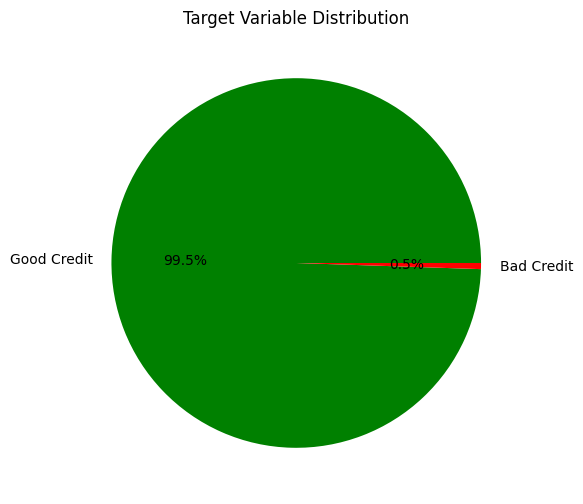

In [22]:
# Checking Class Distribution
print(df['Bad_Credit'].value_counts())

df['Bad_Credit'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['green', 'red'],
    labels=['Good Credit', 'Bad Credit'],
    figsize=(6, 6)
)
plt.title("Target Variable Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()




**#Findings :**\
1.Since bad credit cases make up only 0.1% of the dataset, this indicates a severe class imbalance problem.\
2.If left unaddressed, machine learning models will likely favor the majority class (good credit) and fail to accurately predict bad credit cases.\
3.Hence we can handle this class imbalance further.

#📌 Step 4: Feature Engineering





In [23]:
# Convert DAYS_BIRTH to Age in Years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

In [24]:
#EMPLOYMENT_YEARS
df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'].apply(lambda x: -x // 365 if x != 365243 else np.nan)


In [25]:
#YEARS_BEFORE_EMPLOYMENT(The difference between Age and Employment Duration)
df['YEARS_BEFORE_EMPLOYMENT'] = df['AGE_YEARS'] - df['EMPLOYMENT_YEARS']


In [26]:
#EMPLOYMENT_STATUS
df['EMPLOYMENT_STATUS'] = df['DAYS_EMPLOYED'].apply(lambda x:
    'Unemployed' if x == 365243 else
    'Short-term' if x > -365*2 else
    'Mid-term' if x > -365*5 else
    'Long-term'
)


In [27]:
 # Employment stability ratio
df['EMPLOYMENT_STABILITY'] = df['EMPLOYMENT_YEARS'] / df['AGE_YEARS']

In [28]:
#INCOME PER CHILD
df['INCOME_PER_CHILD'] = df['AMT_INCOME_TOTAL'] / (df['CNT_CHILDREN'] + 1)
#Note:  Why +1? To avoid division by zero when there are no children.

In [29]:
#INCOME PER FAMILY MEMBER
df['INCOME_PER_FAMILY_MEMBER'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
#This shows how much income is available per household member.

In [30]:
#INCOME TO AGE RATIO
df['INCOME_TO_AGE_RATIO'] = df['AMT_INCOME_TOTAL'] / df['AGE_YEARS']
#Higher values indicate higher earnings relative to the applicant's age.

In [31]:
 #INCOME TO EMPLOYMENT RATIO
 df['INCOME_TO_EMPLOYMENT_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS'] + 1)

In [32]:
#INCOME_PER_YEAR
df['INCOME_PER_YEAR'] = df['AMT_INCOME_TOTAL'] / (df['AGE_YEARS'] )

In [33]:
#HOUSE_OWNERSHIP_IMPACT
df['HOUSE_OWNERSHIP_IMPACT'] = df['AMT_INCOME_TOTAL'] * df['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)

In [34]:
#CAR_OWNERSHIP_IMPACT
df['CAR_OWNERSHIP_IMPACT'] = df['AMT_INCOME_TOTAL'] * df['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)

In [35]:
#EMPLOYMENT_GAP_RATIO
df['EMPLOYMENT_GAP_RATIO'] = df['YEARS_BEFORE_EMPLOYMENT'] / df['AGE_YEARS']
#Proportion of life spent unemployed

In [36]:
#EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO
df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO'] = df['YEARS_BEFORE_EMPLOYMENT'] / (df['EMPLOYMENT_YEARS']+1)
#Years before employment compared to total work years

In [37]:
#LONG_TERM_EMPLOYMENT
df['LONG_TERM_EMPLOYMENT'] = df['EMPLOYMENT_YEARS'].apply(lambda x: 1 if x >= 10 else 0)
#Indicator for long-term employment

In [38]:
#UNEMPLOYMENT_INDICATOR
df['UNEMPLOYMENT_INDICATOR'] = df['EMPLOYMENT_YEARS'].apply(lambda x: 1 if x == 365243 else 0)
#Indicator for unemployment


In [39]:
#EMPLOYMENT_INCOME_RATIO
df['EMPLOYMENT_INCOME_RATIO'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS'] + 1)

In [40]:
df['FREQUENT_JOB_CHANGER'] = (df['EMPLOYMENT_GAP_RATIO'] > 0.5).astype(int)

In [41]:
df['EMPLOYMENT_SECURE_SCORE'] = df['LONG_TERM_EMPLOYMENT'] * 100

In [42]:
df['UNEMPLOYMENT_HISTORY'] = df['UNEMPLOYMENT_INDICATOR'] * df['EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO']

In [43]:
df['EMPLOYMENT_TENURE_RATIO'] = df['EMPLOYMENT_YEARS'] / (df['EMPLOYMENT_YEARS'] + df['EMPLOYMENT_GAP_RATIO'] + 1)

In [44]:
df['ANNUAL_EXPENSES_ESTIMATE'] = df['AMT_INCOME_TOTAL'] * 0.6

In [45]:
df['SAVINGS_ESTIMATE'] = df['AMT_INCOME_TOTAL'] - df['ANNUAL_EXPENSES_ESTIMATE']

In [46]:
df['EXPENSE_RATIO'] = df['ANNUAL_EXPENSES_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [47]:
df['WEALTH_INDEX'] = df['SAVINGS_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [48]:
df['DISPOSABLE_INCOME_RATIO'] = df['SAVINGS_ESTIMATE'] / df['AMT_INCOME_TOTAL']

In [49]:
df['INCOME_PER_WORKING_YEAR'] = df['AMT_INCOME_TOTAL'] / (df['EMPLOYMENT_YEARS']+1)

In [50]:
df['INCOME_STABILITY_SCORE'] = (df['AMT_INCOME_TOTAL']> 300000).astype(int)

In [51]:
df['RENT_OR_OWN_INDICATOR'] = (df['NAME_HOUSING_TYPE'] == 'Rented apartment').astype(int)

In [52]:
df['MULTIPLE_PROPERTY_OWNER'] = ((df['FLAG_OWN_REALTY'] == 'Y') & (df['FLAG_OWN_CAR'] == 'Y')).astype(int)

In [53]:
df['CAR_LUXURY_SCORE'] = ((df['FLAG_OWN_CAR'] == 'Y') & (df['AMT_INCOME_TOTAL'] > 500000)).astype(int)

In [54]:
    #  Credit Activity Features
    df['TOTAL_MONTHS'] = df.groupby('ID')['MONTHS_BALANCE'].transform('count')
    df['MONTHS_SINCE_FIRST'] = df.groupby('ID')['MONTHS_BALANCE'].transform('min').abs()
    df['MONTHS_SINCE_LAST'] = df.groupby('ID')['MONTHS_BALANCE'].transform('max').abs()

In [55]:
# Repayment Behavior Features
df['TOTAL_ON_TIME_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == '0').sum())
df['TOTAL_LATE_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x.isin(['1', '2', '3', '4', '5'])).sum())
df['TOTAL_MISSED_PAYMENTS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == 'X').sum())
df['TOTAL_CLOSED_CREDITS'] = df.groupby('ID')['STATUS'].transform(lambda x: (x == 'C').sum())

In [56]:
# Credit Health Ratios
df['LATE_PAYMENT_RATIO'] = df['TOTAL_LATE_PAYMENTS'] / df['TOTAL_MONTHS']
df['ON_TIME_PAYMENT_RATIO'] = df['TOTAL_ON_TIME_PAYMENTS'] / df['TOTAL_MONTHS']
df['MISSED_PAYMENT_RATIO'] = df['TOTAL_MISSED_PAYMENTS'] / df['TOTAL_MONTHS']
df['CREDIT_CLOSURE_RATIO'] = df['TOTAL_CLOSED_CREDITS'] / df['TOTAL_MONTHS']

In [57]:
df.columns.tolist()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'STATUS',
 'Bad_Credit',
 'AGE_YEARS',
 'EMPLOYMENT_YEARS',
 'YEARS_BEFORE_EMPLOYMENT',
 'EMPLOYMENT_STATUS',
 'EMPLOYMENT_STABILITY',
 'INCOME_PER_CHILD',
 'INCOME_PER_FAMILY_MEMBER',
 'INCOME_TO_AGE_RATIO',
 'INCOME_TO_EMPLOYMENT_RATIO',
 'INCOME_PER_YEAR',
 'HOUSE_OWNERSHIP_IMPACT',
 'CAR_OWNERSHIP_IMPACT',
 'EMPLOYMENT_GAP_RATIO',
 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO',
 'LONG_TERM_EMPLOYMENT',
 'UNEMPLOYMENT_INDICATOR',
 'EMPLOYMENT_INCOME_RATIO',
 'FREQUENT_JOB_CHANGER',
 'EMPLOYMENT_SECURE_SCORE',
 'UNEMPLOYMENT_HISTORY',
 'EMPLOYMENT_TENURE_RATIO',
 'ANNUAL_EXPENSES_ESTIMATE',
 'SAVINGS_ESTIMATE',
 'EXPENSE_RATIO',
 'WEALTH_INDEX',
 'DISPO

#📌 Step 5: BINNING

In [58]:
!pip install optbinning

In [ ]:
import pandas as pd
from optbinning import OptimalBinning

# Define the target variable
target = df["Bad_Credit"]

# Categorized variables based on their types
continuous_vars = [
    'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AGE_YEARS', 'EMPLOYMENT_YEARS',
    'YEARS_BEFORE_EMPLOYMENT', 'EMPLOYMENT_STABILITY', 'INCOME_PER_CHILD',
    'INCOME_PER_FAMILY_MEMBER', 'INCOME_TO_AGE_RATIO', 'INCOME_TO_EMPLOYMENT_RATIO',
    'INCOME_PER_YEAR', 'HOUSE_OWNERSHIP_IMPACT', 'CAR_OWNERSHIP_IMPACT', 'EMPLOYMENT_GAP_RATIO',
    'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO', 'EMPLOYMENT_SECURE_SCORE', 'EMPLOYMENT_TENURE_RATIO',
    'ANNUAL_EXPENSES_ESTIMATE', 'SAVINGS_ESTIMATE', 'EXPENSE_RATIO', 'WEALTH_INDEX',
    'DISPOSABLE_INCOME_RATIO',
    'INCOME_PER_WORKING_YEAR', 'INCOME_STABILITY_SCORE',
    'CAR_LUXURY_SCORE', 'TOTAL_MONTHS', 'MONTHS_SINCE_FIRST', 'MONTHS_SINCE_LAST',
    'TOTAL_ON_TIME_PAYMENTS', 'TOTAL_LATE_PAYMENTS', 'TOTAL_MISSED_PAYMENTS',
    'TOTAL_CLOSED_CREDITS', 'LATE_PAYMENT_RATIO', 'ON_TIME_PAYMENT_RATIO', 'MISSED_PAYMENT_RATIO',
    'CREDIT_CLOSURE_RATIO'
]


discrete_vars = [
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
    'FLAG_EMAIL', 'UNEMPLOYMENT_INDICATOR', 'FREQUENT_JOB_CHANGER', 'UNEMPLOYMENT_HISTORY',
    'MULTIPLE_PROPERTY_OWNER', 'RENT_OR_OWN_INDICATOR', 'TOTAL_CLOSED_CREDITS'
]

categorical_vars = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
    'EMPLOYMENT_STATUS'
]

# Dictionary to store binning models
binning_models = {}

# Function to apply optimal binning
def apply_binning(var, var_type):
    print(f"\nBinning for {var}...")

    # Initialize binning model
    optb = OptimalBinning(name=var, dtype=var_type, solver="cp")  # 'cp' is a good general solver
    optb.fit(df[var], target)  # Fit the binning model

    # Print binning table
    print(optb.binning_table.build())

    # Store the binning model
    binning_models[var] = optb

# Apply binning to continuous and discrete variables
for var in continuous_vars:
    apply_binning(var, "numerical")

for var in discrete_vars:
    apply_binning(var, "numerical")  # Discrete variables are treated as numerical in optbinning

for var in categorical_vars:
    apply_binning(var, "categorical")

# Transform dataset by applying the binning rules
df_binned = df.copy()
for var, model in binning_models.items():
    df_binned[var + "_binned"] = model.transform(df[var])

# Save the binned dataset
df_binned.to_csv("binned_dataset.csv", index=False)

print("\n✅ Binning Completed. Transformed dataset saved as 'binned_dataset.csv'.")


Binning for AMT_INCOME_TOTAL...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for DAYS_BIRTH...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.9614

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for YEARS_BEFORE_EMPLOYMENT...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for INCOME_PER_FAMILY_MEMBER...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for INCOME_PER_YEAR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE     

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for EMPLOYMENT_GAP_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.561965  7.261098  0.293254  
1            0.0  0.000000  0.000000  
2      -1.885205  1.598775  0.174681  
Totals            8.859873  0.467934  

Binning for EMPLOYMENT_SECURE_SCORE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for SAVINGS_ESTIMATE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for WEALTH_INDEX...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for INCOME_PER_WORKING_YEAR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for CAR_LUXURY_SCORE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for MONTHS_SINCE_FIRST...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for TOTAL_ON_TIME_PAYMENTS...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             W

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for TOTAL_MISSED_PAYMENTS...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for ON_TIME_PAYMENT_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for CREDIT_CLOSURE_RATIO...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for FLAG_MOBIL...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for FLAG_PHONE...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for UNEMPLOYMENT_HISTORY...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    38808   0.032893      38624      184    0.004741   
1           Special        0   0.000000          0        0    0.000000   
2           Missing  1141007   0.967107       6911  1134096    0.993943   
Totals               1179815   1.000000      45535  1134280    0.961405   

             WoE

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             WoE        IV        JS  
0       8.452571  8.450768  0.345639  
1            0.0  0.000000  0.000000  
2            0.0  0.000000  0.000000  
Totals            8.450768  0.345639  

Binning for RENT_OR_OWN_INDICATOR...
                Bin    Count  Count (%)  Non-event    Event  Event rate  \
0       (-inf, inf)    45777     0.0388      45535      242    0.005286   
1           Special        0     0.0000          0        0    0.000000   
2           Missing  1134038     0.9612          0  1134038    0.000000   
Totals               1179815     1.0000      45535  1134280    0.961405   

             Wo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [F, M]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

              IV        JS  
0       8.450768  0.345639  
1       0.000000  0.000000  
2       0.000000  0.000000  
Totals  8.450768  0.345639  

Binning for FLAG_OWN_CAR...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [N, Y]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

              IV        JS  
0       8.450768  0.345639  
1       0.000000  0.000000  
2       0.000000  0.000000  
Totals  8.450768  0.345639  

Binning for FLAG_OWN_REALTY...
            Bin    Count  Count (%)  Non-event    Event  Event rate       WoE  \
0        [N, Y]    45777     0.0388      45535      242    0.005286  8.452571   
1       Special        0     0.0000          0        0    0.000000       0.0   
2       Missing  1134038     0.9612          0  1134038    0.000000       0.0   
Totals           1179815     1.0000      45535  1134280    0.961405             

           

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Student, Working, Commercial associate, State...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for NAME_EDUCATION_TYPE...
                                                      Bin    Count  Count (%)  \
0       [Academic degree, Lower secondary, Incomplete ...    45777     0.0388   
1                                        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Single / not married, Separated, Widow, Marri...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for NAME_HOUSING_TYPE...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                      Bin    Count  Count (%)  \
0       [Office apartment, Municipal apartment, House ...    45777     0.0388   
1                                                 Special        0     0.0000   
2                                                 Missing  1134038     0.9612   
Totals                                                     1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  

Binning for OCCUPATION_TYPE...
                                                      Bin    Count  Count (%)  \
0       [HR staff, Waiters/barmen staff, Accountants, ...    45777     0.0388   
1                                            

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                                                  Bin    Count  Count (%)  \
0       [Long-term, Mid-term, Short-term, Unemployed]    45777     0.0388   
1                                             Special        0     0.0000   
2                                             Missing  1134038     0.9612   
Totals                                                 1179815     1.0000   

        Non-event    Event  Event rate       WoE        IV        JS  
0           45535      242    0.005286  8.452571  8.450768  0.345639  
1               0        0    0.000000       0.0  0.000000  0.000000  
2               0  1134038    0.000000       0.0  0.000000  0.000000  
Totals      45535  1134280    0.961405            8.450768  0.345639  


/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)
/usr/local/lib/python3.11/dist-pack

In [ ]:
# List all columns that have the '_binned' suffix
binned_columns = [col for col in df_binned.columns if '_binned' in col]

# Print the binned columns
print(binned_columns)


**#📌 Step 6: CALCULATING WOE(Weight of Evidence)**

In [ ]:
import pandas as pd
import numpy as np

# Define the binned columns list (you provided this)
binned_columns = [
    'AMT_INCOME_TOTAL_binned', 'DAYS_BIRTH_binned', 'DAYS_EMPLOYED_binned', 'AGE_YEARS_binned',
    'EMPLOYMENT_YEARS_binned', 'YEARS_BEFORE_EMPLOYMENT_binned', 'EMPLOYMENT_STABILITY_binned',
    'INCOME_PER_CHILD_binned', 'INCOME_PER_FAMILY_MEMBER_binned', 'INCOME_TO_AGE_RATIO_binned',
    'INCOME_TO_EMPLOYMENT_RATIO_binned', 'INCOME_PER_YEAR_binned', 'HOUSE_OWNERSHIP_IMPACT_binned',
    'CAR_OWNERSHIP_IMPACT_binned', 'EMPLOYMENT_GAP_RATIO_binned', 'EMPLOYMENT_GAP_TO_EMPLOYMENT_RATIO_binned',
    'EMPLOYMENT_SECURE_SCORE_binned', 'EMPLOYMENT_TENURE_RATIO_binned', 'ANNUAL_EXPENSES_ESTIMATE_binned',
    'SAVINGS_ESTIMATE_binned', 'EXPENSE_RATIO_binned', 'WEALTH_INDEX_binned', 'DISPOSABLE_INCOME_RATIO _binned',
    'INCOME_PER_WORKING_YEAR  _binned', 'INCOME_STABILITY_SCORE_binned', 'CAR_LUXURY_SCORE_binned',
    'TOTAL_MONTHS_binned', 'MONTHS_SINCE_FIRST_binned', 'MONTHS_SINCE_LAST_binned',
    'TOTAL_ON_TIME_PAYMENTS_binned', 'TOTAL_LATE_PAYMENTS_binned', 'TOTAL_MISSED_PAYMENTS_binned',
    'TOTAL_CLOSED_CREDITS_binned', 'LATE_PAYMENT_RATIO_binned', 'ON_TIME_PAYMENT_RATIO_binned',
    'MISSED_PAYMENT_RATIO_binned', 'CREDIT_CLOSURE_RATIO_binned', 'CNT_CHILDREN_binned',
    'CNT_FAM_MEMBERS_binned', 'FLAG_MOBIL_binned', 'FLAG_WORK_PHONE_binned', 'FLAG_PHONE_binned',
    'FLAG_EMAIL_binned', 'UNEMPLOYMENT_INDICATOR_binned', 'FREQUENT_JOB_CHANGER_binned',
    'UNEMPLOYMENT_HISTORY_binned', 'MULTIPLE_PROPERTY_OWNER_binned', 'RENT_OR_OWN_INDICATOR_binned',
    'CODE_GENDER_binned', 'FLAG_OWN_CAR_binned', 'FLAG_OWN_REALTY_binned', 'NAME_INCOME_TYPE_binned',
    'NAME_EDUCATION_TYPE_binned', 'NAME_FAMILY_STATUS_binned', 'NAME_HOUSING_TYPE_binned', 'OCCUPATION_TYPE_binned',
    'EMPLOYMENT_STATUS_binned'
]

# Define the function to compute WOE for each binned column
def compute_woe(df, feature, target):
    # Group by the binned feature and calculate the counts of bad and good
    df_grouped = df.groupby(feature)[target].value_counts().unstack(fill_value=0)

    # Calculate the total number of good (Bad_Credit == 0) and bad (Bad_Credit == 1)
    total_good = df[target].value_counts().get(0, 0)
    total_bad = df[target].value_counts().get(1, 0)

    # Calculate the distribution of good and bad per bin
    df_grouped['Good_Distribution'] = df_grouped[0] / total_good
    df_grouped['Bad_Distribution'] = df_grouped[1] / total_bad

    # Calculate WOE
    df_grouped['WOE'] = np.log(df_grouped['Good_Distribution'] / df_grouped['Bad_Distribution'])

    return df_grouped[['WOE']]

# Apply WOE calculation for each binned column
woe_dict = {}
for column in binned_columns:
    woe_dict[column] = compute_woe(df_binned, column, 'Bad_Credit')

# Convert the dictionary to a single DataFrame with all WOE values
woe_df = pd.concat(woe_dict, axis=1)

# Display the WOE for the binned columns
print(woe_df)


In [ ]:
#Fill NaN WOE values with 0 (or any other value of your choice)
woe_df_filled = woe_df.fillna(0)
woe_df_filled

In [ ]:
# Summary statistics for the WOE values
print(woe_df_filled.describe())

# Visualize the WOE distribution for any column (e.g., AMT_INCOME_TOTAL_binned)
import matplotlib.pyplot as plt
woe_df_filled['AMT_INCOME_TOTAL_binned'].plot(kind='bar') # Changed woe_df_clean to woe_df_filled
plt.title("WOE Distribution for AMT_INCOME_TOTAL_binned")
plt.show()